Census Income Project

Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



To download the dataset, use the link given below. 

Downlaod Files:
https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [71]:
# loading the dataset
df =pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


#### Observation: As we can see, a lot of values in Capital_gain and Capital_loss are zeroes.

In [72]:
df[df['Capital_gain']==0].count()

Age               29849
Workclass         29849
Fnlwgt            29849
Education         29849
Education_num     29849
Marital_status    29849
Occupation        29849
Relationship      29849
Race              29849
Sex               29849
Capital_gain      29849
Capital_loss      29849
Hours_per_week    29849
Native_country    29849
Income            29849
dtype: int64

In [73]:
# checking Zero count
df[df['Capital_loss']==0].count()

Age               31041
Workclass         31041
Fnlwgt            31041
Education         31041
Education_num     31041
Marital_status    31041
Occupation        31041
Relationship      31041
Race              31041
Sex               31041
Capital_gain      31041
Capital_loss      31041
Hours_per_week    31041
Native_country    31041
Income            31041
dtype: int64

In [74]:
df.shape

(32560, 15)

In [75]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

#### Observation: We have int and object datatypes.

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [77]:
# checking Null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

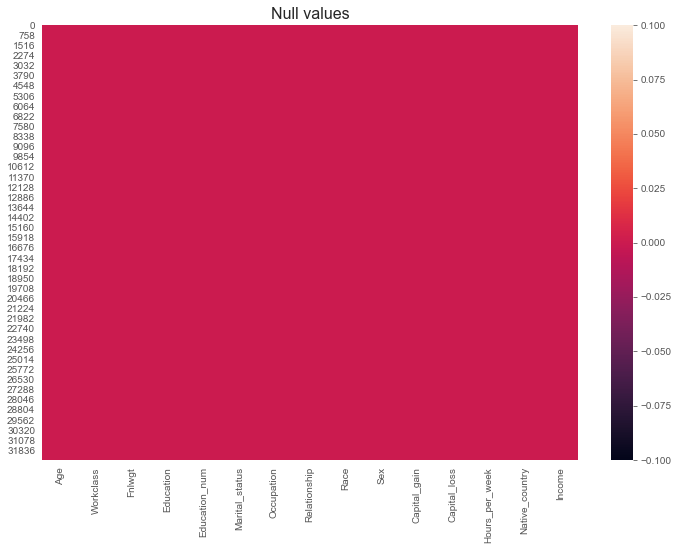

In [78]:
plt.figure(figsize=(12,8))
plt.title('Null values',fontsize=16)
sns.heatmap(df.isnull());

#### Observation: We can visualize that there is no null value present in dataset.

In [79]:
# statistical summary
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### Observation: There is no missing value present in the numerical columns as count of each column is 32560 . Minimum Age of a person who earns money is 17 and Maximum age is 90 and average age is 38.

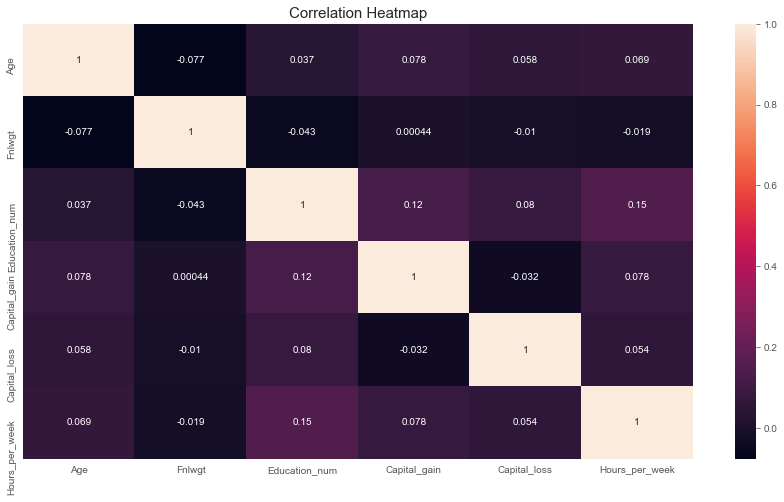

In [80]:
## correlation Plot
plt.figure(figsize=(15,8))
plt.title('Correlation Heatmap',fontsize=15)
sns.heatmap(df.corr(),annot=True);

# Making DataFrame for object and int datatypes

In [81]:
# for numeric columns
num_df = df.select_dtypes(exclude='object')

# for categorical columns
obj_df = df.select_dtypes(include='object')

In [82]:
num_df.head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


In [83]:
obj_df.head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


# Categorical attributes

In [84]:
for col in obj_df:
    print('\n')
    print('---------------',col,'---------------')
    print(obj_df[col].value_counts())



--------------- Workclass ---------------
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


--------------- Education ---------------
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


--------------- Marital_status ---------------
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418


#### Observation: Workclass,Occupation and Native Country contains a "?", we will replace with mode values.

In [85]:
# replacing '?' np.nan
df= df.replace(' ?',np.nan)

In [86]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

#### Obs: workclass has 1836 null values occupation 1843 and Native country has 583 null values

# filling null values

In [87]:
df['Workclass']= df['Workclass'].fillna(df['Workclass'].mode()[0])
df['Occupation']= df['Occupation'].fillna(df['Occupation'].mode()[0])
df['Native_country']= df['Native_country'].fillna(df['Native_country'].mode()[0])

In [88]:
df_1 = df.copy()

# Feature Engineering:

In [89]:
df_1['Workclass']=df_1['Workclass'].replace([' Without-pay',' Never-worked'],'unemployed')
df_1['Workclass']=df_1['Workclass'].replace([' State-gov',' Local-gov',' Federal-gov'],'government')
df_1['Workclass']=df_1['Workclass'].replace([' Self-emp-not-inc',' Self-emp-inc'],'self_employed')

In [90]:
df_1['Workclass'].value_counts()

 Private         24532
government        4350
self_employed     3657
unemployed          21
Name: Workclass, dtype: int64

In [91]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [92]:
df_1['Education'].replace(' Preschool','dropout',inplace=True)
df_1['Education'].replace(' 10th','dropout',inplace=True)
df_1['Education'].replace(' 11th','dropout',inplace=True)
df_1['Education'].replace(' 12th','dropout',inplace=True)
df_1['Education'].replace(' 1st-4th','dropout',inplace=True)
df_1['Education'].replace(' 5th-6th','dropout',inplace=True)
df_1['Education'].replace(' 7th-8th','dropout',inplace=True)
df_1['Education'].replace(' 9th','dropout',inplace=True)
df_1['Education'].replace(' HS-Grad','HighGrad',inplace=True)
df_1['Education'].replace(' HS-grad','HighGrad',inplace=True)
df_1['Education'].replace(' Some-college','CommunityCollege',inplace=True)
df_1['Education'].replace(' Assoc-acdm','CommunityCollege',inplace=True)
df_1['Education'].replace(' Assoc-voc','CommunityCollege',inplace=True)
df_1['Education'].replace(' Bachelors','Bachelors',inplace=True)
df_1['Education'].replace(' Masters','Masters',inplace=True)
df_1['Education'].replace(' Prof-school','Masters',inplace=True)
df_1['Education'].replace(' Doctorate','Doctorate',inplace=True)

In [93]:
df_1['Education'].value_counts()

HighGrad            10501
CommunityCollege     9740
Bachelors            5354
dropout              4253
Masters              2299
Doctorate             413
Name: Education, dtype: int64

In [94]:
df_1['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [95]:
df_1['Marital_status']=df_1['Marital_status'].replace([' Married-civ-spouse',' Married-AF-spouse'],'married')
df_1['Marital_status']=df_1['Marital_status'].replace([' Separated',' Widowed',' Divorced',' Married-spouse-absent'],'once_married')
df_1['Marital_status']=df_1['Marital_status'].replace(' Never-married','never_married')

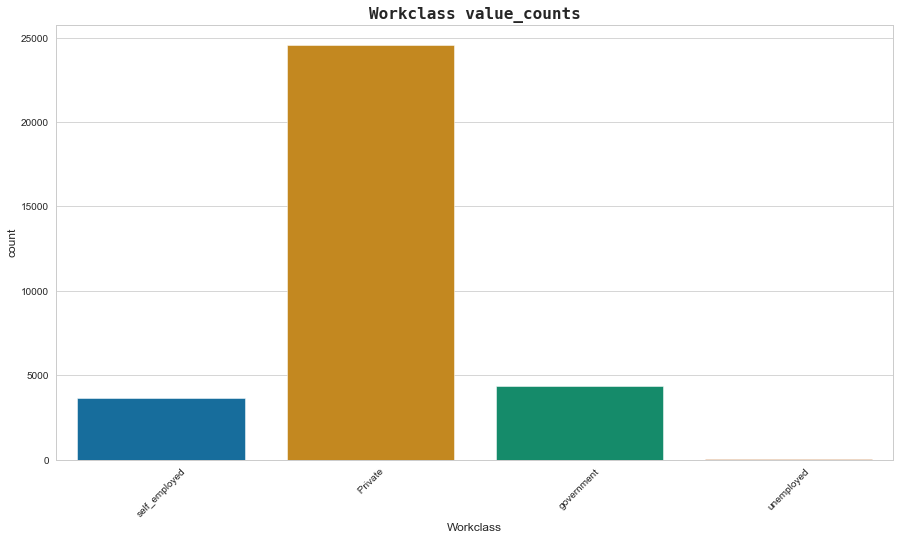

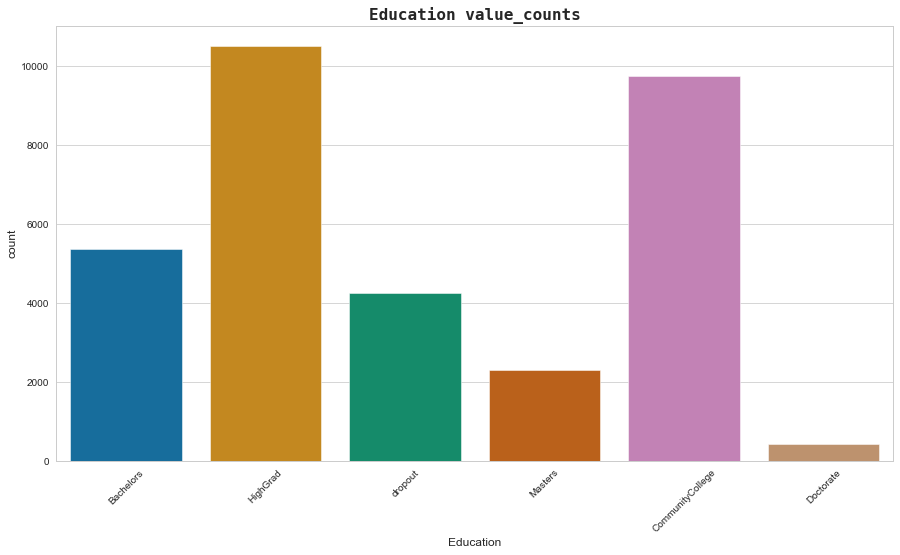

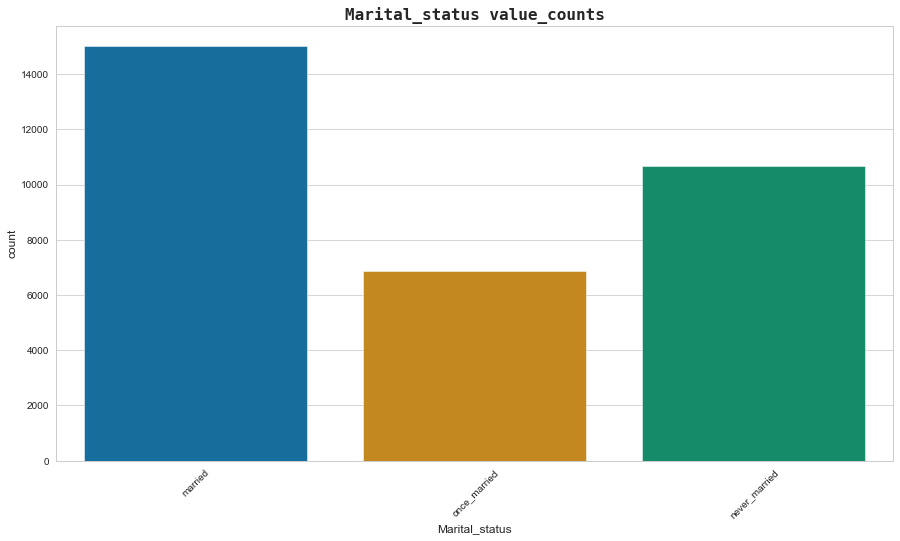

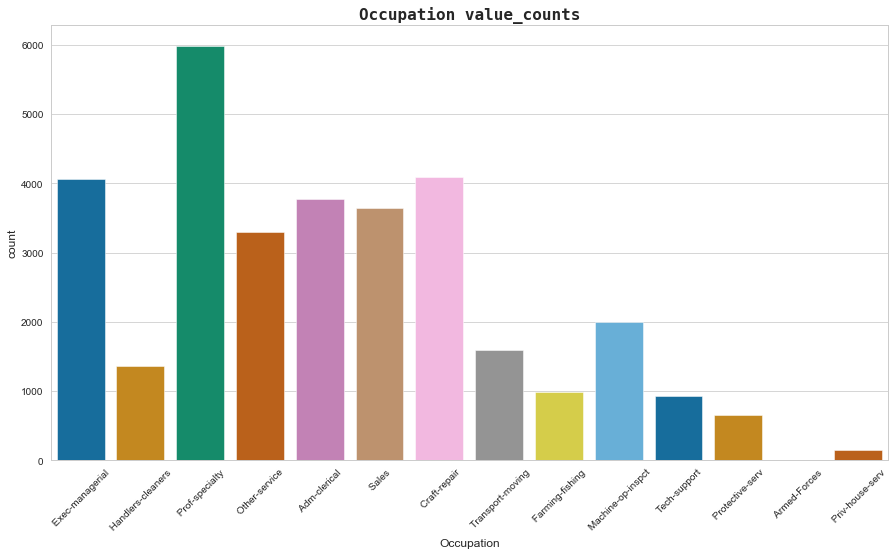

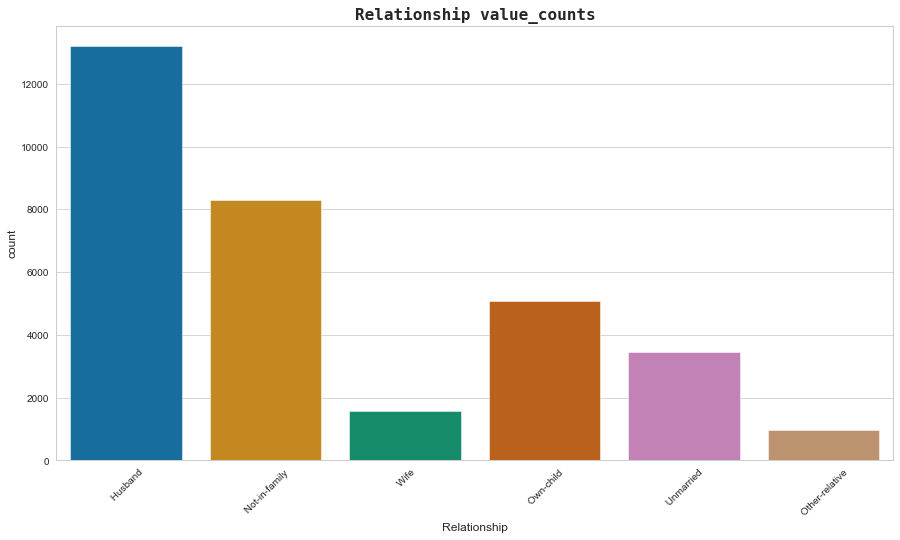

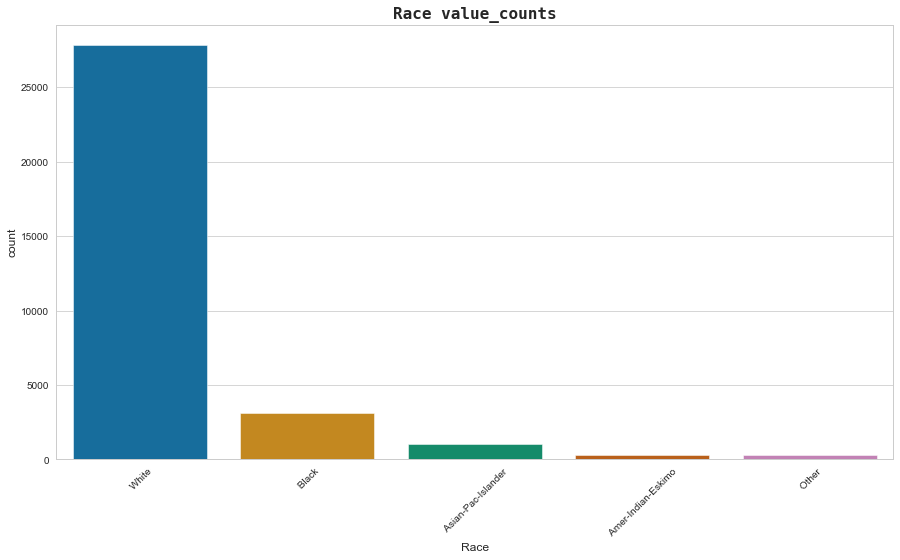

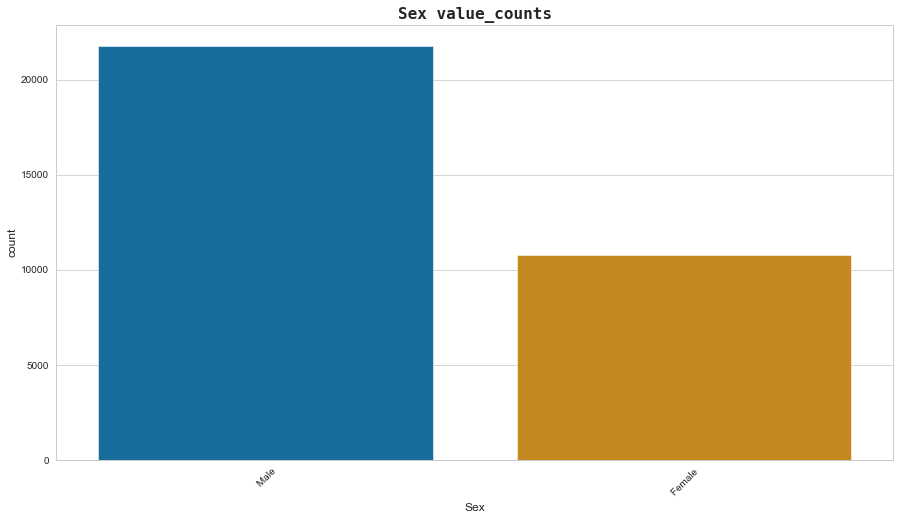

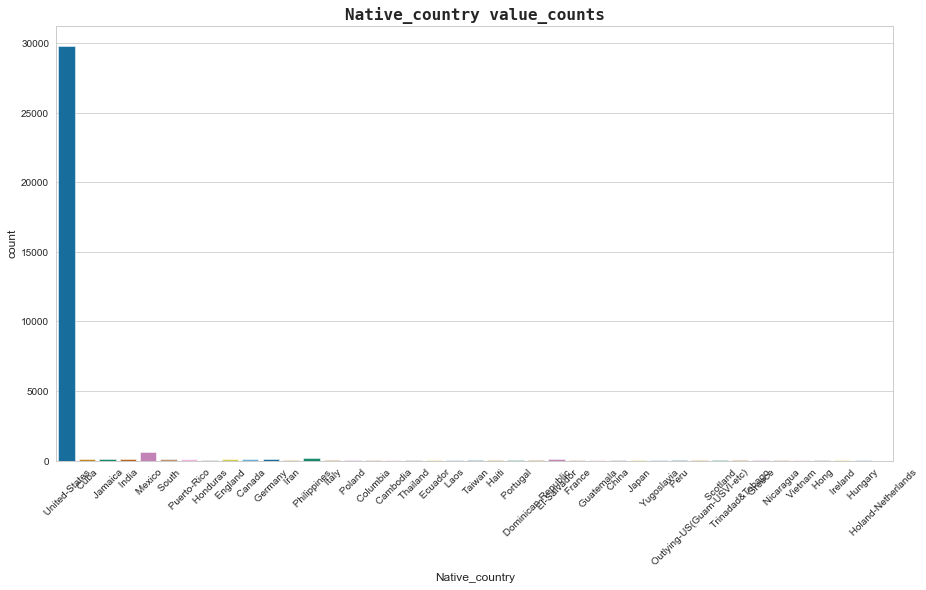

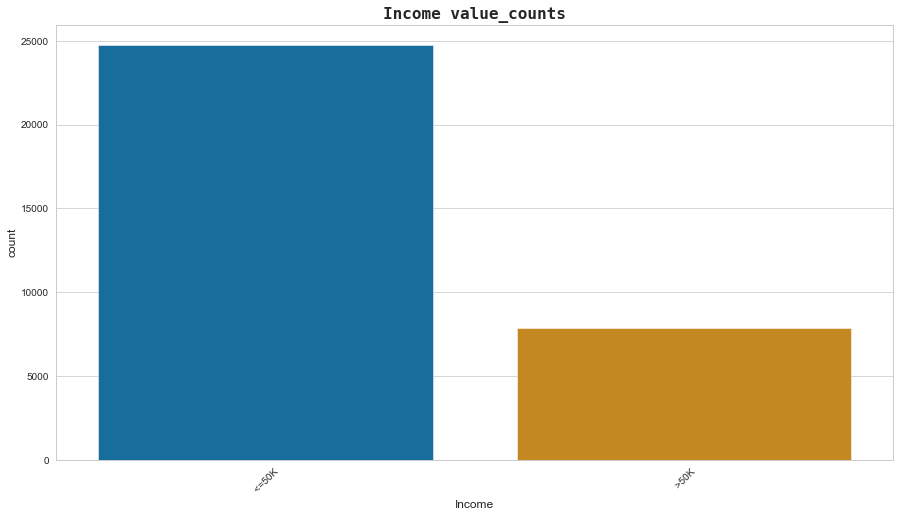

In [96]:
obj = df_1.select_dtypes(include='object')
for col in obj:
    sns.set_style('whitegrid')
    plt.figure(figsize=(15,8))
    plt.title(col+' value_counts',fontsize=16,fontname='Monospace',fontweight='bold')
    plt.xticks(rotation=45)
    x= sns.countplot(df_1[col],palette='colorblind',data=df_1)
    plt.show();

#### Obs: workclass - The count of individuals working in a private sector is high as compared to other sectors.

education - The count of individuals having HS-grad are more follwed by the individuals having community-college, followed by bachelor people.

marital-status - The individual who married are more followed by the individuals who not-married. The count of once married inviduals is above 6000.

occupation - The count of individuals working as a Prof-specialty id higest in the data followed by individuals working as a Craft-repair > Exec-managerial > Adm-clerical > Sales > Other-service.

relationship - The count of individuals as husband is approx. 13200 followed by individuals not-in-family as compared to other individual's relationship.

race - The count of white individuals is high.

sex - The count of females is alost half of the count of males.

native-country - The majority of individuals belongs to United-States.

income - The no. of individuals have income of more than or equal to 50k.

# Creating a barplot for 'Years of Education'

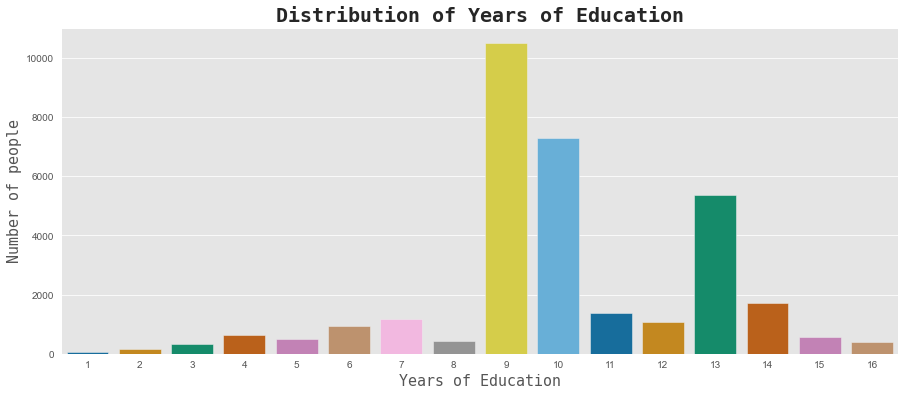

In [97]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 6))
sns.countplot(df_1['Education_num'], palette='colorblind',data=df_1)
plt.title('Distribution of Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15});

Mostly people have done 9 years of education followed by 10 years then 13 & 14 years.

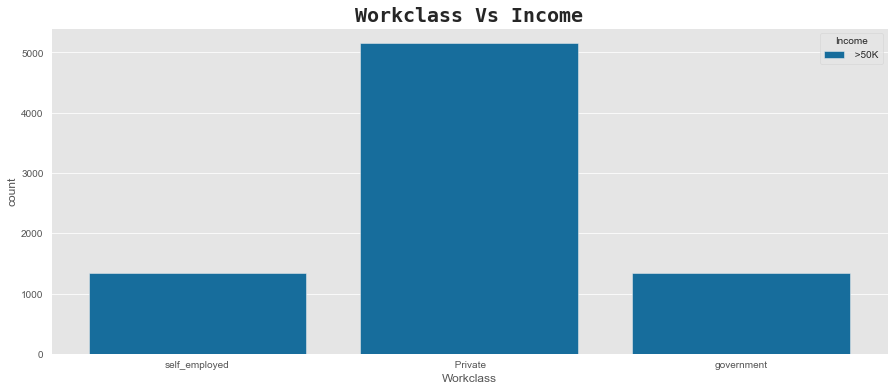

In [98]:
plt.figure(figsize=(15,6))
plt.title('Workclass Vs Income',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.countplot(x ="Workclass", hue ="Income",palette='colorblind' ,data = df_1[df_1['Income']==' >50K'])
plt.plot();

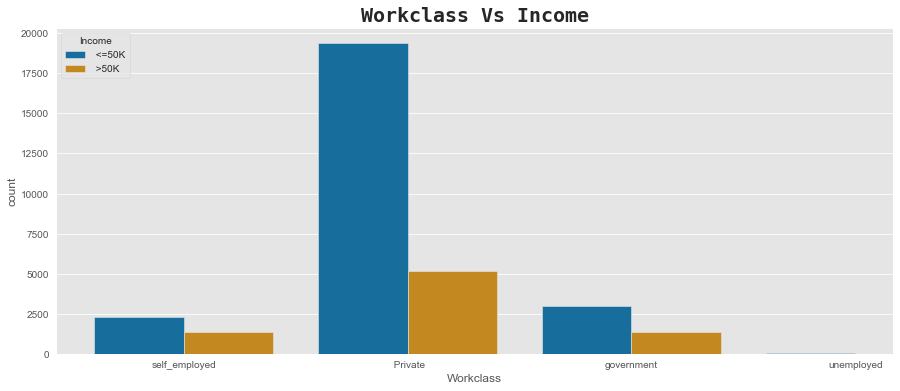

In [99]:
plt.figure(figsize=(15,6))
plt.title('Workclass Vs Income',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.countplot(x ="Workclass", hue ="Income",palette='colorblind' ,data = df_1)
plt.plot();

We can see that people who are in private job ears more than 50k followed by self_employed and Government job.

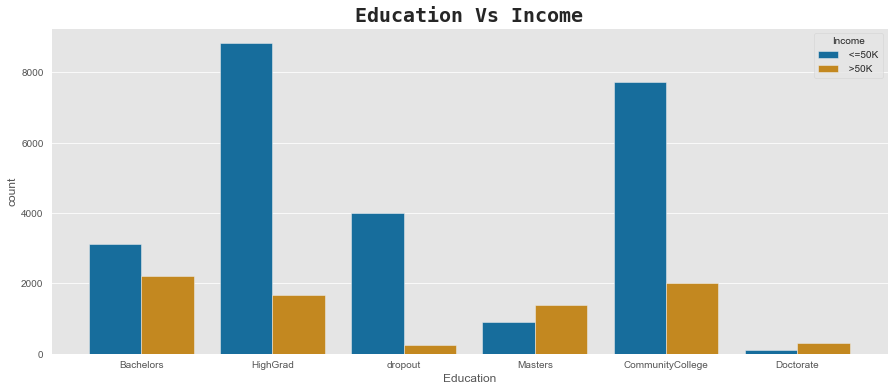

In [100]:
plt.figure(figsize=(15,6))
plt.title('Education Vs Income',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.countplot(x ="Education", hue ="Income",palette='colorblind' ,data = df_1)
plt.plot();

People who have gone for Bachleors are earning more than 50k.Additionally, people who gone for masters and Doctorate ears very well which is more than 50k.

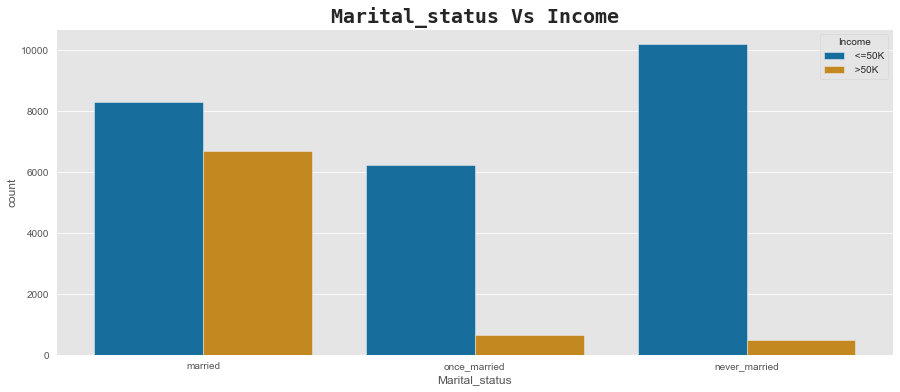

In [101]:
plt.figure(figsize=(15,6))
plt.title('Marital_status Vs Income',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.countplot(x ="Marital_status", hue ="Income",palette='colorblind' ,data = df_1)
plt.plot();

married people earned mostly more than 50k whereas People who divorced,Seperated or widows generally ears less than 50k.

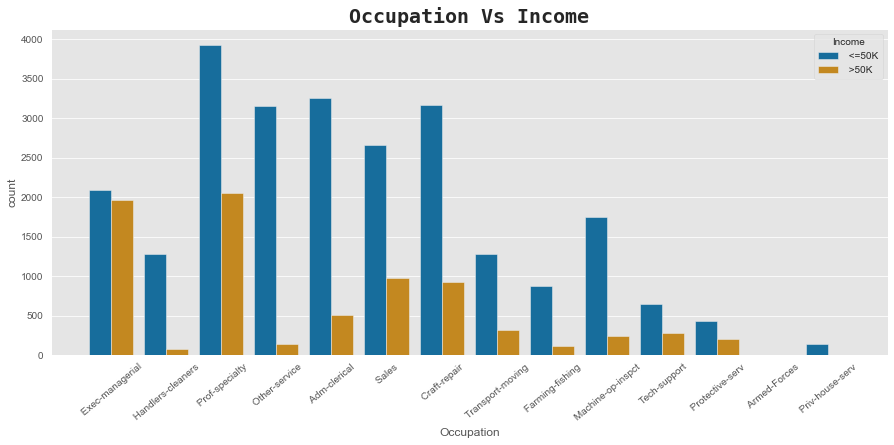

In [102]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=40)
plt.title('Occupation Vs Income',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.countplot(x ="Occupation", hue ="Income",palette='colorblind' ,data = df_1)
plt.plot();

We can see that people who had been in Managerial Position ears mostly above 50k.

As well, People who have some teaching career like professor are also earning 50k as comapired to other occupation.

Sales and carft repair occupation also earns more than 50k.

farming-fishing,Armed Forces and Private house service occpationalist generally not earns more than 50k.

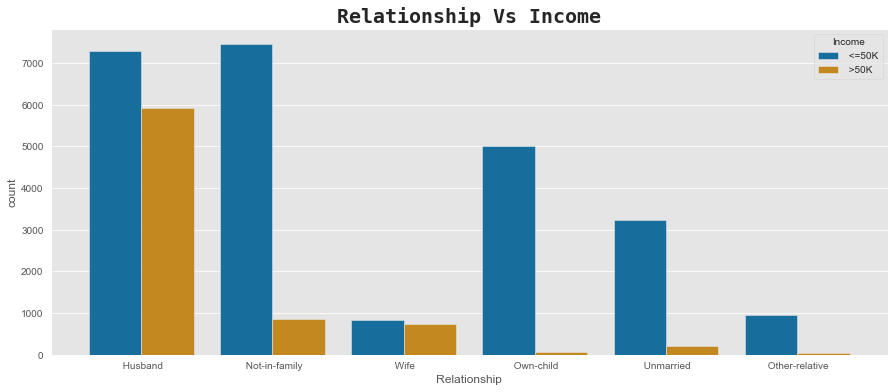

In [103]:
plt.figure(figsize=(15,6))
plt.title('Relationship Vs Income',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.countplot(x ="Relationship", hue ="Income",palette='colorblind' ,data = df_1)
plt.plot();

Husbands are earning more than 50k compaired to wife. But in ratios, wife have good numbers in figure to earn more than 50k.'

People who are single or Unmarried earns majorly below 50k.

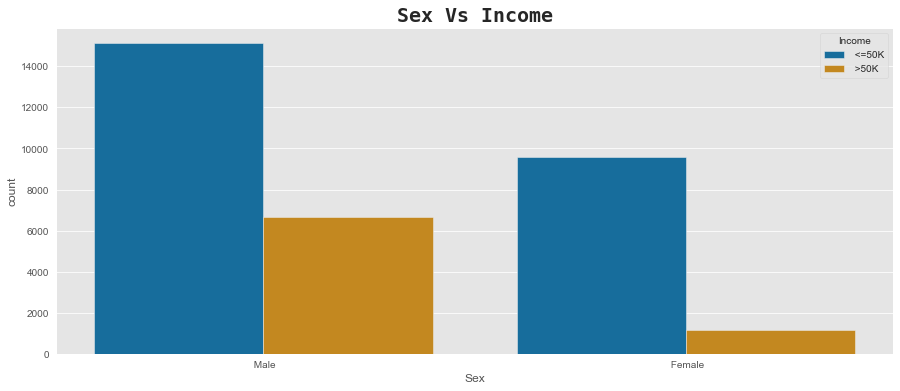

In [104]:
plt.figure(figsize=(15,6))
plt.title('Sex Vs Income',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.countplot(x ="Sex", hue ="Income",palette='colorblind' ,data = df_1)
plt.plot();

Males earned more than 50k as compared to Female.

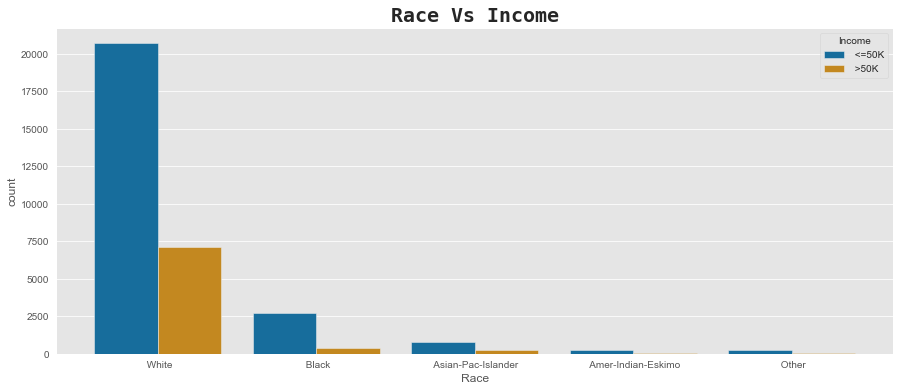

In [105]:
plt.figure(figsize=(15,6))
plt.title('Race Vs Income',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.countplot(x ="Race", hue ="Income",palette='colorblind' ,data = df_1)
plt.plot();

White people are the highest earnes. Approx 7000 of white people earns more than 50k.

For, black people majority of than earns less than 50k.

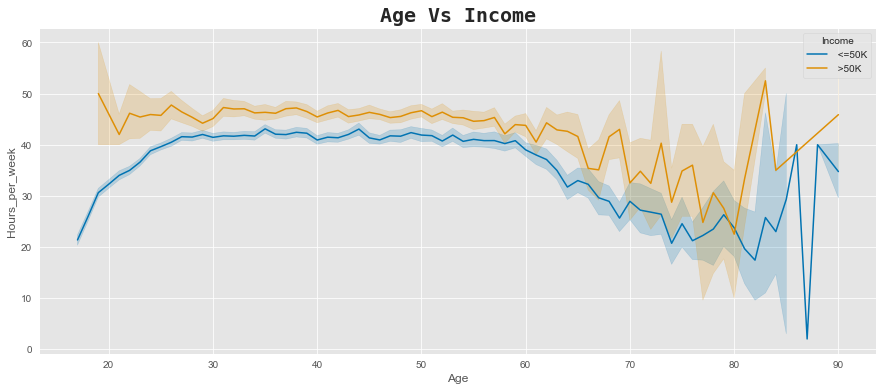

In [106]:
plt.figure(figsize=(15,6))
plt.title('Age Vs Income',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.lineplot(x ="Age", y='Hours_per_week',hue ="Income",palette='colorblind' ,data = df_1)
plt.plot();

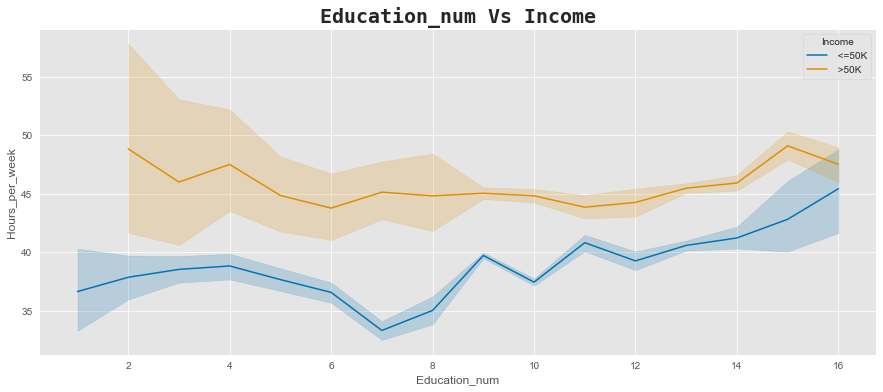

In [107]:
plt.figure(figsize=(15,6))
plt.title('Education_num Vs Income',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.lineplot(x ='Education_num', y='Hours_per_week',hue ="Income",palette='colorblind' ,data = df_1)
plt.plot();

people who earns more than 50k, work more than 43hr a week whereas people who earn less than 50k works below 40hr in week.

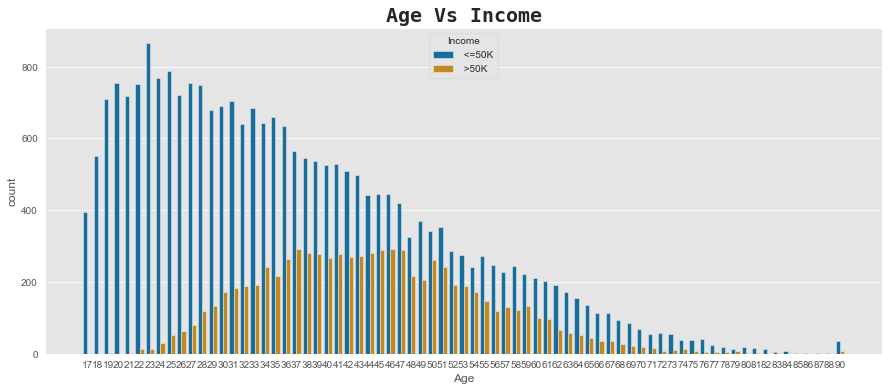

In [108]:
plt.figure(figsize=(15,6))
plt.title('Age Vs Income',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.countplot(x ="Age", hue ="Income",palette='colorblind' ,data = df_1)
plt.plot();

people who earned more than 50k has a age group of 31-55(mostly).

We can observe that people who has the age group of 17-31 generally earns less than 50k.

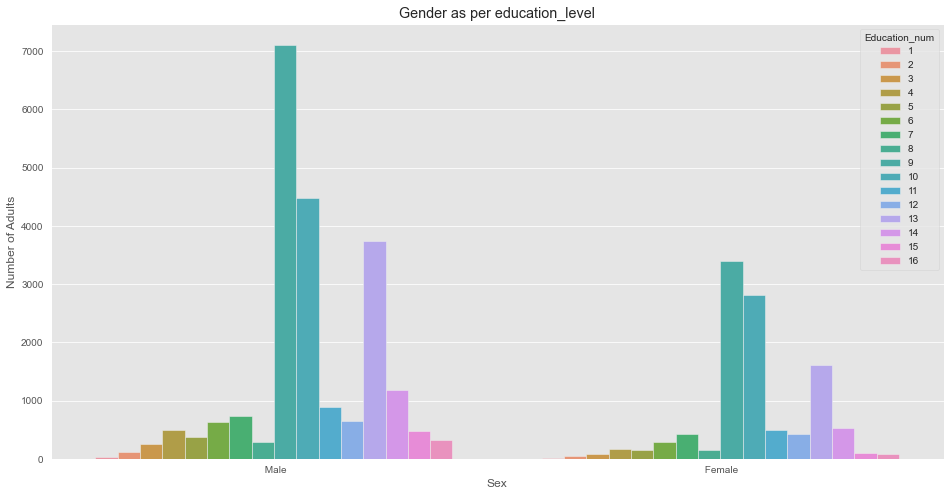

In [109]:
plt.figure(figsize=(16,8))
sns.countplot(x="Sex",hue="Education_num", data = df_1)
plt.ylabel('Number of Adults')
plt.title('Gender as per education_level');

Very few females have education level ≥ 14 in the dataset where the majority of adults earn more than 50k dollars annually, this explains a bit why very few females earn more than 50k dollars annually

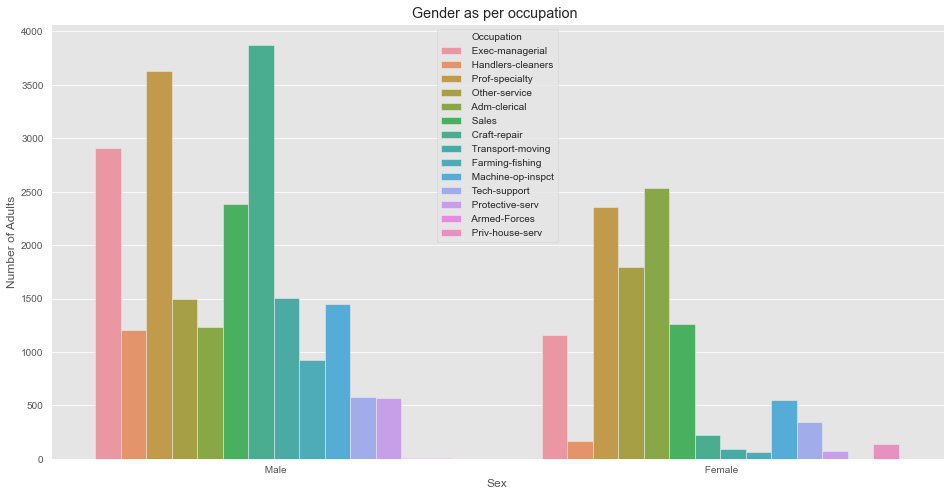

In [110]:
plt.figure(figsize=(16,8))
sns.countplot(x="Sex",hue="Occupation", data = df_1)
plt.ylabel('Number of Adults')
plt.title('Gender as per occupation ');

Representation of females is very high in Adm-clerical jobs which is a relatively low income occupation, also female representation is very low in craft repair occupation which is a relatively higher income occupation, this also explains a bit why males earn higher

# checking the data distribution

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>],
       [<AxesSubplot:title={'center':'Education_num'}>,
        <AxesSubplot:title={'center':'Capital_gain'}>],
       [<AxesSubplot:title={'center':'Capital_loss'}>,
        <AxesSubplot:title={'center':'Hours_per_week'}>]], dtype=object)

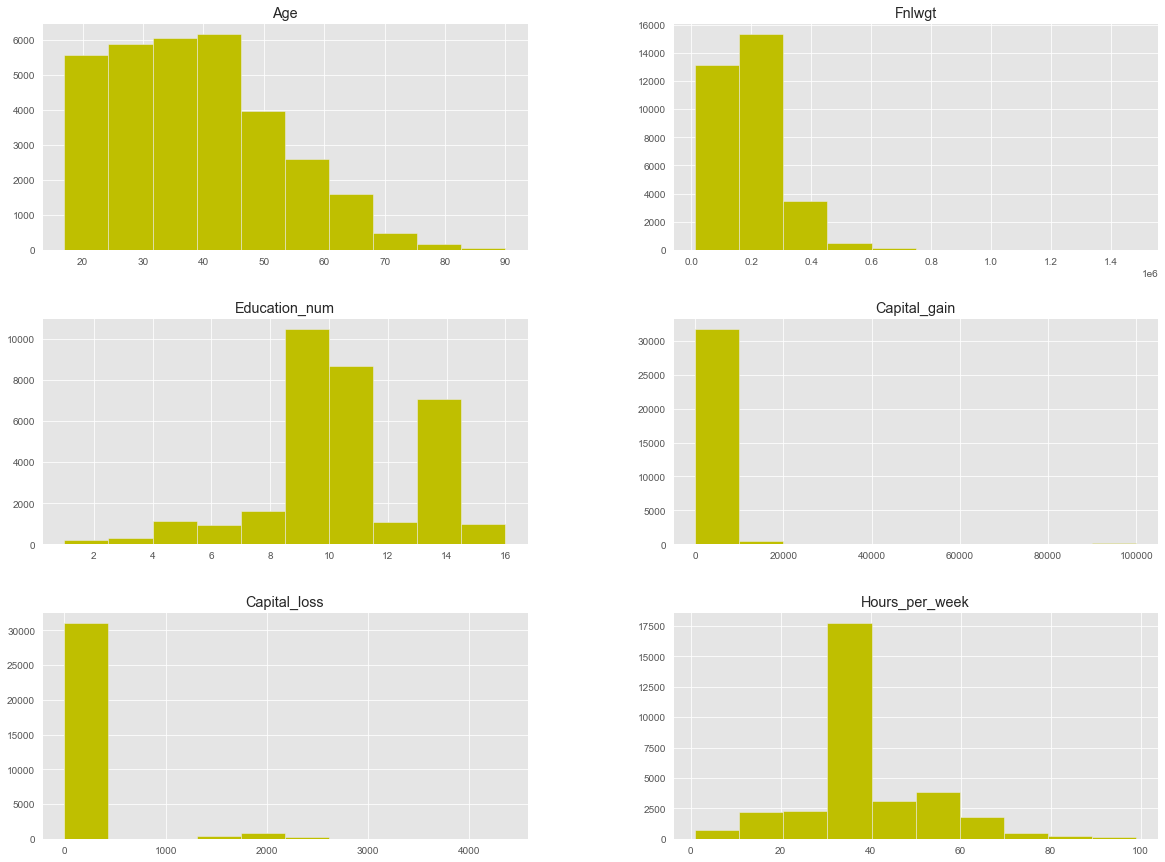

In [111]:
df_1.hist(color = 'y' , figsize=(20,15))

# Outliers

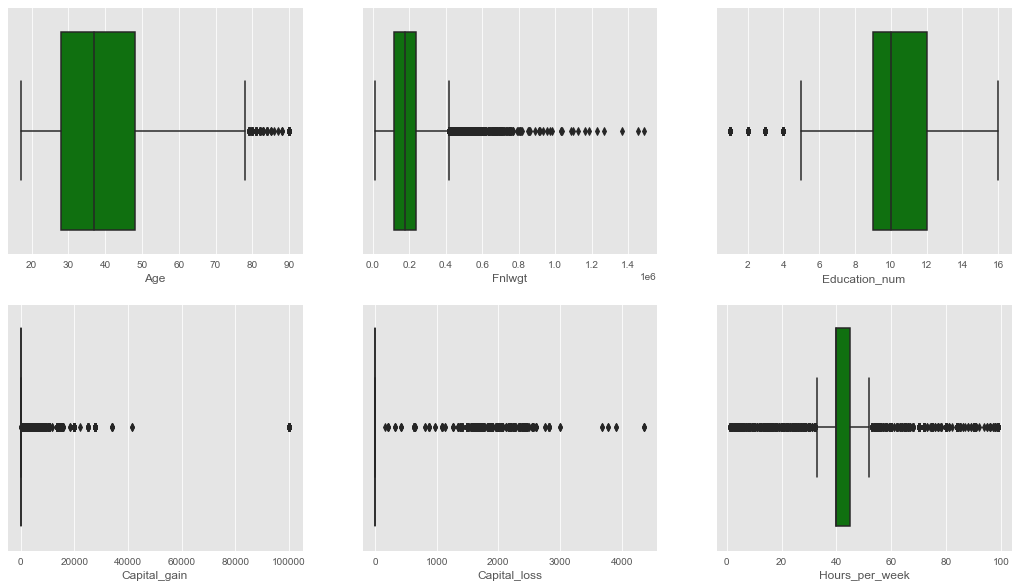

In [112]:
plt.figure(figsize=(18,10))
plot=1
for col in num_df:
    if plot<=6:
        plt.subplot(2,3,plot)
        sns.boxplot(df_1[col],color='green')
        plt.xlabel(col)
        plot=plot+1
plt.show();

In [113]:
def outlier_IQR(data,col):
    IQR=data[col].quantile(.75)-data[col].quantile(.25)
    lower_bridge=data[col].quantile(.25)-(IQR*1.5)
    upper_bridge=data[col].quantile(.75)+(IQR*1.5)
    non_outlier=np.where((data[col]<lower_bridge )|(data[col]>upper_bridge),data[col].median(),data[col])
    data[col]=non_outlier
    sns.boxplot(data[col])

In [114]:
df_1.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

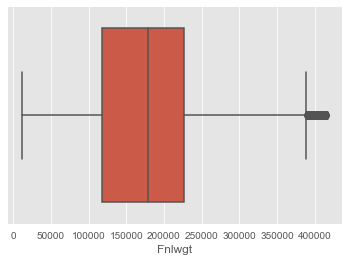

In [115]:
outlier_IQR(df_1,'Fnlwgt')

# when data is normally distributed.

In [116]:
def replace_outlier(df,col):
    IQR=df[col].quantile(.75)-df[col].quantile(.25)
    lower_limit=df[col].quantile(.25)-(1.5*IQR)
    upper_limit=df[col].quantile(.75)+(1.5*IQR)
    non_outlier=np.where((df[col]<lower_limit )|(df[col]>upper_limit),df[col].median(),df[col])
    df[col]=non_outlier
    plt.subplot(1,2,1)
    sns.distplot(df[col])
    plt.subplot(1,2,2)
    sns.boxplot(df[col])

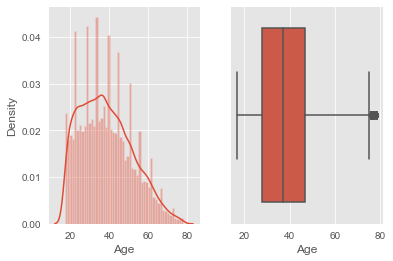

In [117]:
replace_outlier(df_1,'Age')

# Again checking distribution

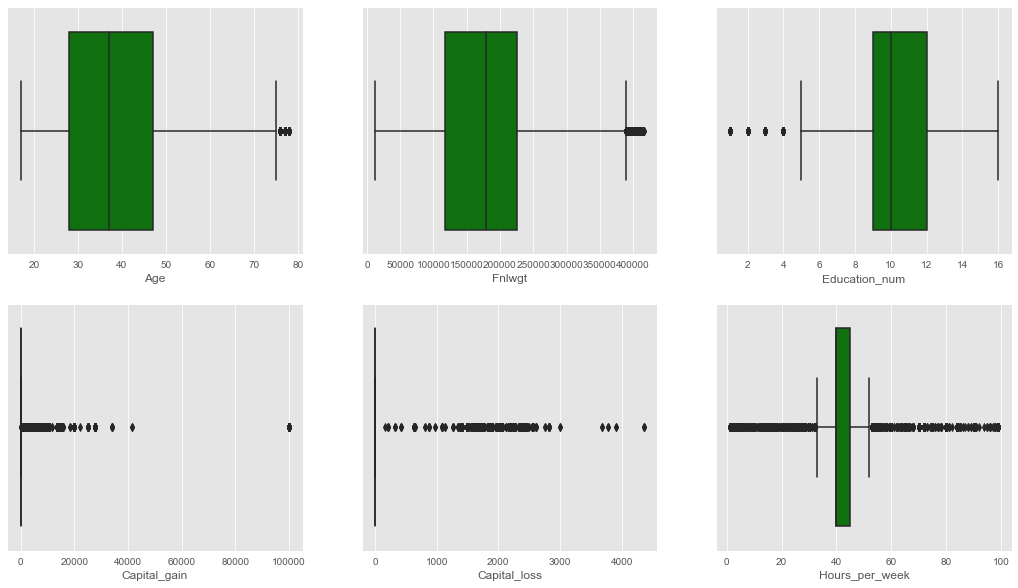

In [118]:
plt.figure(figsize=(18,10))
plot=1
for col in num_df:
    if plot<=6:
        plt.subplot(2,3,plot)
        sns.boxplot(df_1[col],color='green')
        plt.xlabel(col)
        plot=plot+1
plt.show();

In [119]:
# droping both columns with all zero values
df_1=df_1.drop(['Capital_gain','Capital_loss'],axis=1)

# Skewness

In [120]:
df_1.skew()

Age               0.470101
Fnlwgt            0.419158
Education_num    -0.311630
Hours_per_week    0.227636
dtype: float64

In [121]:
df_2=df_1.copy()
df_2['Hours_per_week']=np.log1p(df_2['Hours_per_week'])
df_2.skew()

Age               0.470101
Fnlwgt            0.419158
Education_num    -0.311630
Hours_per_week   -2.357666
dtype: float64

skewness is handled

# encoding

In [122]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [123]:
for i in df_2.columns:
    if df_2[i].dtypes == "object":
        df_2[i] = enc.fit_transform(df_2[i].values.reshape(-1,1))

In [124]:
df_2.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50.0,2.0,83311.0,0.0,13,0.0,3.0,0.0,4.0,1.0,2.639057,38.0,0.0
1,38.0,0.0,215646.0,3.0,9,2.0,5.0,1.0,4.0,1.0,3.713572,38.0,0.0
2,53.0,0.0,234721.0,5.0,7,0.0,5.0,0.0,2.0,1.0,3.713572,38.0,0.0
3,28.0,0.0,338409.0,0.0,13,0.0,9.0,5.0,2.0,0.0,3.713572,4.0,0.0
4,37.0,0.0,284582.0,4.0,14,0.0,3.0,5.0,4.0,0.0,3.713572,38.0,0.0


# Splitting Data into Input and Output Variable

In [125]:
x=df_2.drop(['Income'],axis=1)
y=df_2[['Income']]

# Feature scaling

In [126]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.873962,2.420574,-1.119241,-1.359288,1.134779,-0.961272,-0.790156,-0.900177,0.393675,0.703087,-2.651860,0.261374
1,-0.028233,-0.531644,0.419057,0.471337,-0.420027,1.600021,-0.286703,-0.277810,0.393675,0.703087,0.124561,0.261374
2,1.099511,-0.531644,0.640790,1.691754,-1.197429,-0.961272,-0.286703,-0.900177,-1.962583,0.703087,0.124561,0.261374
3,-0.780062,-0.531644,1.846088,-1.359288,1.134779,-0.961272,0.720204,2.211658,-1.962583,-1.422298,0.124561,-5.352855
4,-0.103416,-0.531644,1.220388,1.081545,1.523480,-0.961272,-0.790156,2.211658,0.393675,-1.422298,0.124561,0.261374


# Feature Importance

In [127]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(x,y)

ExtraTreesClassifier()

In [128]:
print(extra.feature_importances_)

[0.18695849 0.025093   0.20921494 0.0502515  0.08764559 0.11262148
 0.08779627 0.06763896 0.01685547 0.02213776 0.11594492 0.01784161]


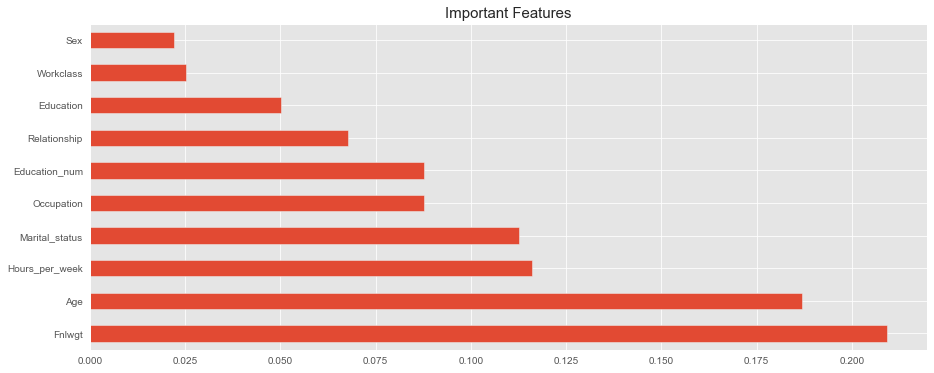

In [129]:
plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(extra.feature_importances_,index=x.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show();

# Model Building

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc
from imblearn.over_sampling import SMOTE

In [131]:
def model_run(clf,x,y):
    max_accuracy=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i,stratify=y)
        #x_train,y_train=SMOTE().fit_resample(x_train,y_train) ##over sampling of our Data
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        accuracy_check=accuracy_score(y_test,pred)
        if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max accuracy score corresponding to',final_r,'is',max_accuracy*100)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='accuracy').mean()*100)
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='accuracy').std()*100)
    print('\n')
    print('F1 score',f1_score(y_test,pred)*100)
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train)*100)
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test)*100)
    print('\n')
    print('Confusion Matrix',confusion_matrix(y_test,pred))
    print('\n')
    print('Classification Report',classification_report(y_test,pred))
    print('\n')
    print('Roc_auc Score',roc_auc_score(y_test,pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")
    return final_r

# Logistic Regression

max accuracy score corresponding to 85 is 82.89312039312038


cross validation score 82.12530712530712


Standard Deviation 0.3981983540138299


F1 score 56.99596033786265


Training accuracy 82.10995085995087


Test Accuracy 82.01781326781327


Confusion Matrix [[4565  379]
 [ 792  776]]


Classification Report               precision    recall  f1-score   support

         0.0       0.85      0.92      0.89      4944
         1.0       0.67      0.49      0.57      1568

    accuracy                           0.82      6512
   macro avg       0.76      0.71      0.73      6512
weighted avg       0.81      0.82      0.81      6512



Roc_auc Score 0.7091196915659468





85

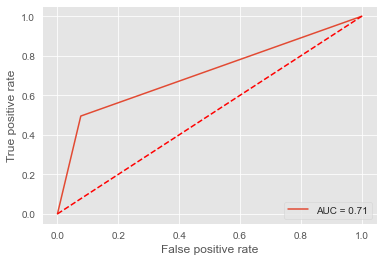

In [132]:
lg=LogisticRegression()
model_run(lg,x,y)

# Decision Tree

max accuracy score corresponding to 60 is 78.51658476658476


cross validation score 77.48157248157248


Standard Deviation 0.35679448971640243


F1 score 53.68020304568527


Training accuracy 99.99232186732186


Test Accuracy 77.57985257985258


Confusion Matrix [[4206  738]
 [ 722  846]]


Classification Report               precision    recall  f1-score   support

         0.0       0.85      0.85      0.85      4944
         1.0       0.53      0.54      0.54      1568

    accuracy                           0.78      6512
   macro avg       0.69      0.70      0.69      6512
weighted avg       0.78      0.78      0.78      6512



Roc_auc Score 0.6951344858331682





60

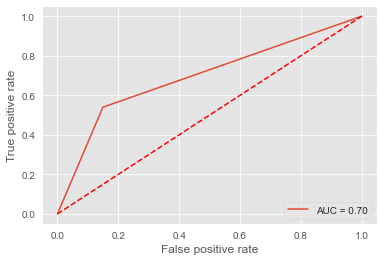

In [133]:
dt=DecisionTreeClassifier()
model_run(dt,x,y)

# KNN

max accuracy score corresponding to 42 is 82.61670761670761


cross validation score 81.32063882063882


Standard Deviation 0.42585335468046304


F1 score 61.1439842209073


Training accuracy 86.8166461916462


Test Accuracy 81.84889434889435


Confusion Matrix [[4400  544]
 [ 638  930]]


Classification Report               precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      4944
         1.0       0.63      0.59      0.61      1568

    accuracy                           0.82      6512
   macro avg       0.75      0.74      0.75      6512
weighted avg       0.81      0.82      0.82      6512



Roc_auc Score 0.7415399412192062





42

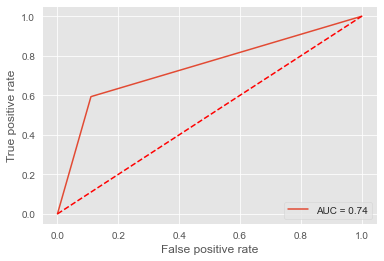

In [134]:
knn = KNeighborsClassifier()
model_run(knn,x,y)

# Naive Bayes

max accuracy score corresponding to 56 is 78.25552825552825


cross validation score 77.19594594594594


Standard Deviation 0.4500198038223679


F1 score 58.933833377980186


Training accuracy 77.17291154791155


Test Accuracy 76.4588452088452


Confusion Matrix [[3879 1065]
 [ 468 1100]]


Classification Report               precision    recall  f1-score   support

         0.0       0.89      0.78      0.84      4944
         1.0       0.51      0.70      0.59      1568

    accuracy                           0.76      6512
   macro avg       0.70      0.74      0.71      6512
weighted avg       0.80      0.76      0.78      6512



Roc_auc Score 0.7430589954428373





56

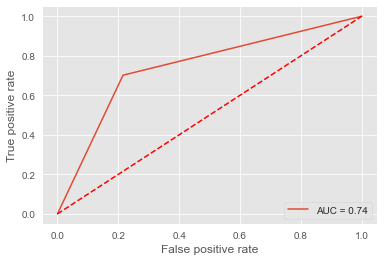

In [66]:
gnb =GaussianNB()
model_run(gnb,x,y)

# Random Forest

max accuracy score corresponding to 77 is 83.39987714987716


cross validation score 82.34643734643734


Standard Deviation 0.3480964246641956


F1 score 61.7350369872226


Training accuracy 99.98848280098281


Test Accuracy 82.52457002457002


Confusion Matrix [[4456  488]
 [ 650  918]]


Classification Report               precision    recall  f1-score   support

         0.0       0.87      0.90      0.89      4944
         1.0       0.65      0.59      0.62      1568

    accuracy                           0.83      6512
   macro avg       0.76      0.74      0.75      6512
weighted avg       0.82      0.83      0.82      6512



Roc_auc Score 0.7433768410276732





77

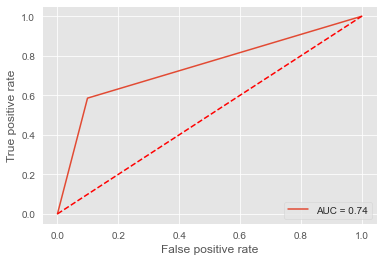

In [67]:
rf = RandomForestClassifier()
model_run(rf,x,y)

# AdaBoost

max accuracy score corresponding to 85 is 84.33660933660934


cross validation score 83.53808353808354


Standard Deviation 0.4601758004843876


F1 score 61.906412478336215


Training accuracy 83.86824324324324


Test Accuracy 83.12346437346437


Confusion Matrix [[4520  424]
 [ 675  893]]


Classification Report               precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      4944
         1.0       0.68      0.57      0.62      1568

    accuracy                           0.83      6512
   macro avg       0.77      0.74      0.76      6512
weighted avg       0.82      0.83      0.83      6512



Roc_auc Score 0.7418773941615481





85

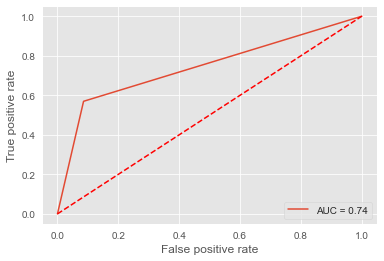

In [68]:
adb = AdaBoostClassifier()
model_run(adb,x,y)

# Gradient Boost

max accuracy score corresponding to 58 is 84.76658476658476


cross validation score 83.9527027027027


Standard Deviation 0.4191332213570527


F1 score 63.07371349095967


Training accuracy 84.42874692874693


Test Accuracy 83.6916461916462


Confusion Matrix [[4543  401]
 [ 661  907]]


Classification Report               precision    recall  f1-score   support

         0.0       0.87      0.92      0.90      4944
         1.0       0.69      0.58      0.63      1568

    accuracy                           0.84      6512
   macro avg       0.78      0.75      0.76      6512
weighted avg       0.83      0.84      0.83      6512



Roc_auc Score 0.748667731655769





58

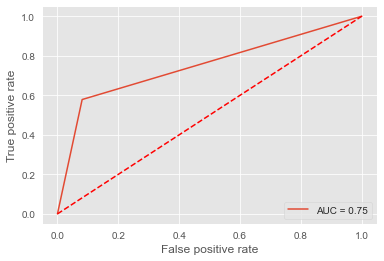

In [69]:
gb = GradientBoostingClassifier()
model_run(gb,x,y)

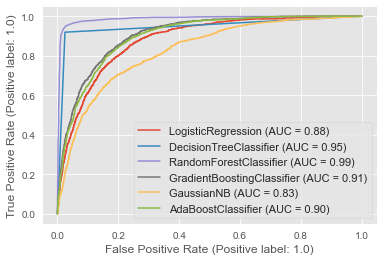

In [144]:
from sklearn.metrics import plot_roc_curve,roc_auc_score
# Let's check ROC_AUC curve for fitted models:

disp = plot_roc_curve(lg,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gnb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(adb,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

### Observation: Adaboost model is most generalized model because the difference between accuracy score and Cross validation score is minimum. So we will select AdaBoost Classifier as our best model.

In [137]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=85,test_size=.20,stratify=y)

ada=AdaBoostClassifier()

param={'n_estimators': [100,200,300],'learning_rate':[.001,.01,.1,1,10],'algorithm':['SAMME', 'SAMME.R']}

grid=GridSearchCV(estimator=ada,param_grid=param,scoring='accuracy',n_jobs=-1)

grid.fit(x_train,y_train)

grid.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 300}

In [138]:
ada_final=AdaBoostClassifier(n_estimators=300,algorithm='SAMME.R',learning_rate=1)
ada_final.fit(x_train,y_train)
pred=ada_final.predict(x_test)
print('Final Accuracy_score :',accuracy_score(pred,y_test)*100)
print('\n')
print('Final f_1 score :',f1_score(pred,y_test)*100)
print('\n')
print('Final roc_auc score :',roc_auc_score(pred,y_test)*100)
print('\n')
print('Final classification Report :',classification_report(pred,y_test))
print('\n')
print('Final confusion Matrix :',confusion_matrix(pred,y_test))

Final Accuracy_score : 84.50552825552825


Final f_1 score : 64.55918510713032


Final roc_auc score : 79.72547316923469


Final classification Report :               precision    recall  f1-score   support

         0.0       0.93      0.88      0.90      5233
         1.0       0.59      0.72      0.65      1279

    accuracy                           0.85      6512
   macro avg       0.76      0.80      0.77      6512
weighted avg       0.86      0.85      0.85      6512



Final confusion Matrix : [[4584  649]
 [ 360  919]]


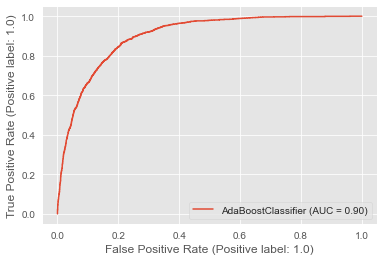

In [139]:
#check the ROC-AUC Curve of RFC after hyperparameter tuning:

disp = plot_roc_curve(ada_final,x_test,y_test)

# Comparing y_pred with y_test to check the model performance

In [140]:
pred_ada = ada_final.predict(x_test)         #We make prediction for the x_test data, and compare the obtained pred_values 
                                            #with the actual y_test values to check our model performance
pred_ada 

array([0., 0., 0., ..., 0., 0., 1.])

In [141]:
y_test

,Income
18279,0.0
27335,0.0
19929,0.0
29699,0.0
31462,0.0
...,...
26039,0.0
2019,0.0
11978,1.0
23308,0.0


# Saving the model

In [142]:
import joblib
joblib.dump(ada_final,'CensusAda_Project.pkl')

['CensusAda_Project.pkl']

In [143]:
# Loading Model
loaded_model=joblib.load('CensusAda_Project.pkl')
prediction=loaded_model.predict(x_test)

# Conclusion

Most of the population earns less than ($50K) annually  while  a  few  earn  more  than  $50K.

There is no equal pay system in those various populations, as many of the female professionals earn less than male professionals with the same degree or profession.

The ratio of males to females is low; the number of white people participating is the highest compared to other races, which is indicative of a social bias towards a specific race.